## Airline Tweets by LDA using Variational Inference (gensim)

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%autosave 120
pd.set_option('display.max_colwidth', 900)

Autosaving every 120 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
tweets = pd.read_csv('data/twitter-airline/Tweets.csv', usecols=['text'])
tweets.head(10)

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials to the experience... tacky.
2,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,@VirginAmerica and it's a really big bad thing about it
5,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [4]:
tweets.shape

(14640, 1)

In [5]:
import re

HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'
def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

tweets['text'] = tweets.text.apply(clean)
tweets.head(10)

,text
0,What said.
1,plus you've added commercials to the experience... tacky.
2,I didn't today... Must mean I need to take another trip!
3,"it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces they have little recourse"
4,and it's a really big bad thing about it
5,seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,"yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,"Really missed a prime opportunity for Men Without Hats parody, there."
8,"Well, I didn't…but NOW I DO! :-D"
9,"it was amazing, and arrived an hour early. You're too good to me."


In [17]:
tweets['text'].sample(frac=0.6,replace=False,random_state=0).to_csv('./data/twitter-airline/airline.txt',encoding='utf-8')

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [19]:
file='./data/twitter-airline/airline.txt'
f=open(file,'r',encoding='utf-8')
text=f.read()
f.close()

In [20]:
text

'13983,  In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can\'t reach arpt for AA2450. Wat 2 do?\n14484,"  after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs."\n6403,  can\'t believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow.\n9653,  I can legitimately say that I would have rather driven cross country than flown on US Airways.\n13268,  still no response from AA. great job guys!\n2384,"  we have developers flying down tmrw morn. w/45 min layover, there is an earlier flight to have 1.5hr layover, can move them up?"\n9613,  hello??? Anyone there?\n11612,    Mr. Husain u shld protest as well when one of ur party member Rehman Malik delayed a PIA flight for hours..???\n9252,"  not likely, flightaware says plane is still in Durango and hasn\'t departed."\n13923,  they don\'t even give an option to hold.. Just say lines are busy Plz try 

In [21]:
doc=nlp(text)

In [22]:
pos_list=['NOUN'] #We can experiment with other or a combinations of parts of speech ['NOUN','ADJ','VERB','ADV'] #['NOUN','ADJ']

In [23]:
preproc_text=[]
preproc_sent=[]

for token in doc:
    if token.text!='\n':
        if not(token.is_stop) and not(token.is_punct) and token.pos_ in pos_list:
            preproc_sent.append(token.lemma_)
    else:
        preproc_text.append(preproc_sent)
        preproc_sent=[]

preproc_text.append(preproc_sent) #last sentence

print(preproc_text)

[['car', 'gng', '1hr', 'road', 'hold', '1hr'], ['plane', 'land', 'condition'], ['customer', 'reason', 'flight', 'bdl'], ['cross', 'country'], ['response', 'job', 'guy'], ['developer', 'morn', 'flight', 'layover'], [], ['shld', 'protest', 'party', 'member', 'flight', 'hour'], ['flightaware', 'plane'], ['option', 'line'], ['announcement', 'mobility', 'disability', 'lot', 'stuff'], ['drink', 'snack'], ['passport', 'time', 'trip', 'photo'], ['bag', 'friend', 'bag', 'day', 'issue', 'update', 'system'], ['travel', 'fund', 'expiration', 'date', 'print'], ['door', 'minute', 'flight', 'leave', 'minute', 'plane'], ['month', 'experience'], ['cab', 'ride', 'love', 'bag'], ['morning'], ['tfw1', 'tweet'], ['status', 'flight'], ['people', 'line', 'customer', 'service', 'customer', 'service'], ['tonight', 'plane', '😢', '😕'], ['hold', 'reservation', 'desk', 'hour'], ['flight', 'flight', 'plane', 'snack', 'crumb', 'seat'], ['commutation'], ['plane', 'virus', 'flight', 'date'], ['guy', 'enquire', 'email'

In [24]:
len(preproc_text)

8300

## LDA

In [25]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(preproc_text)
corpus = [dictionary.doc2bow(text) for text in preproc_text]

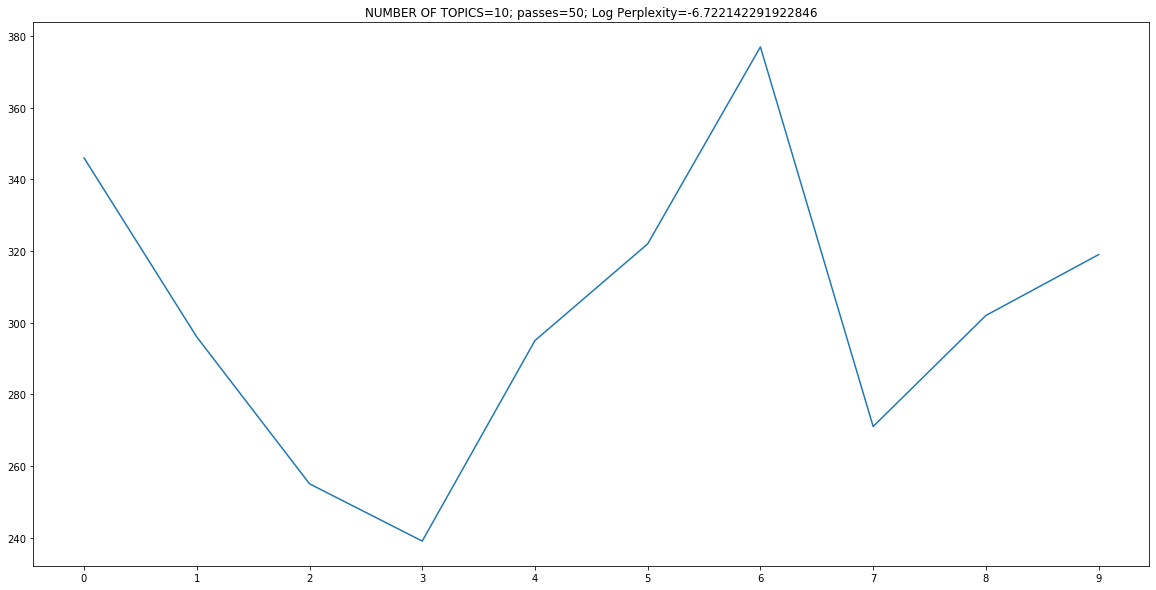

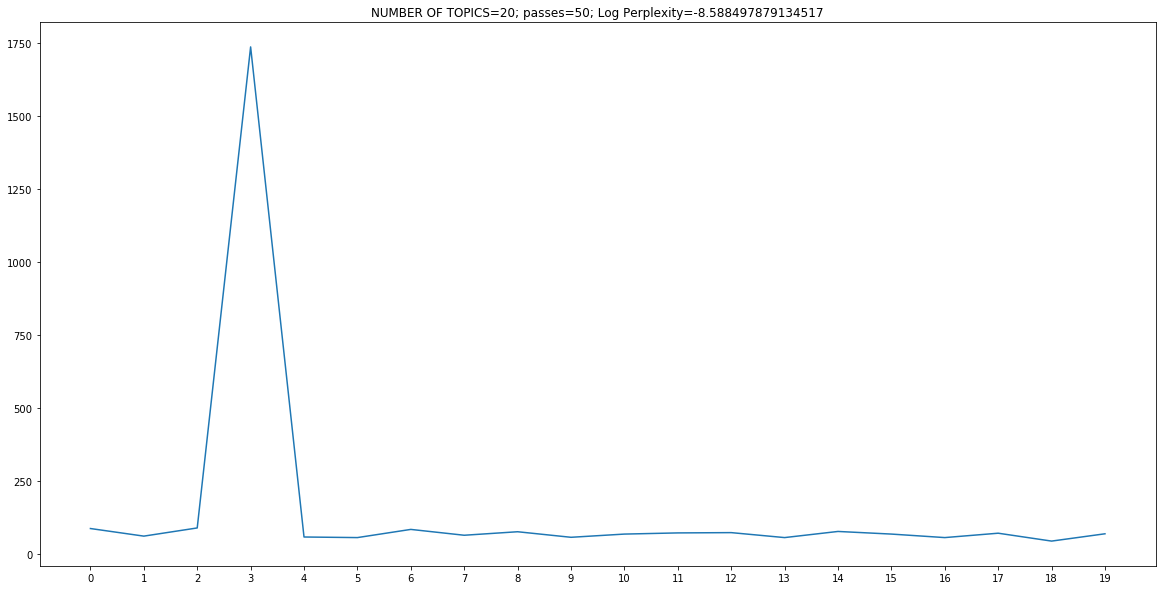

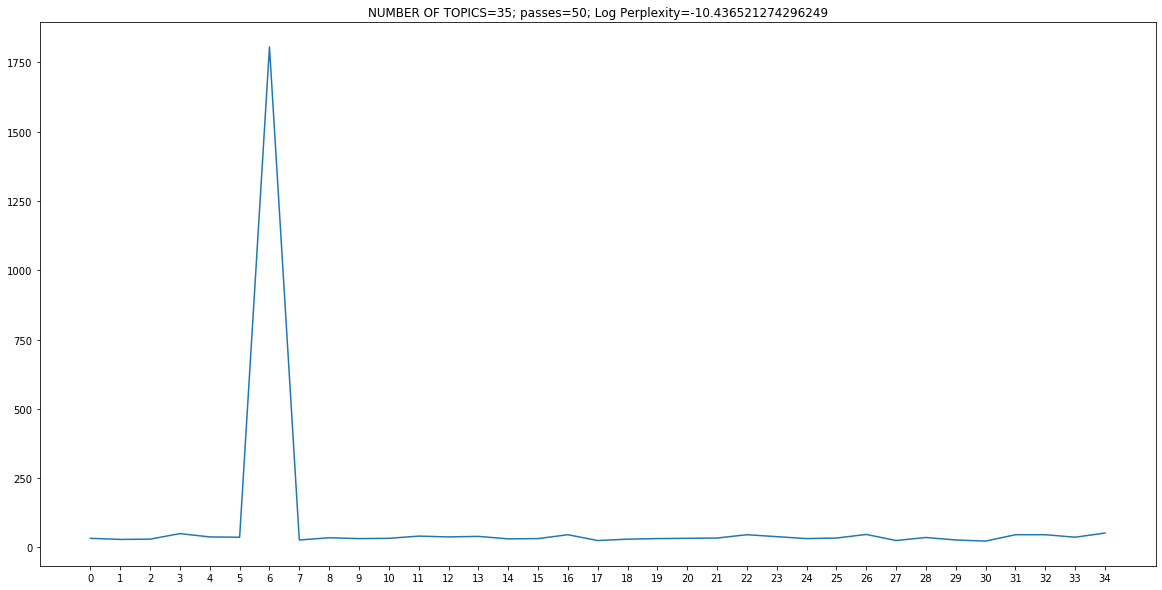

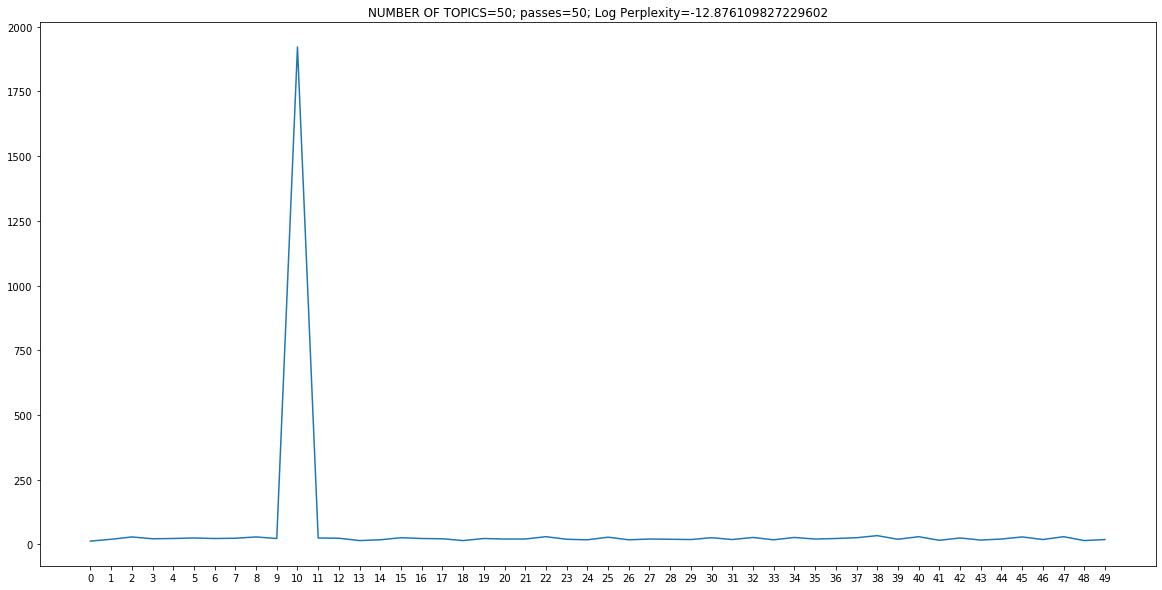

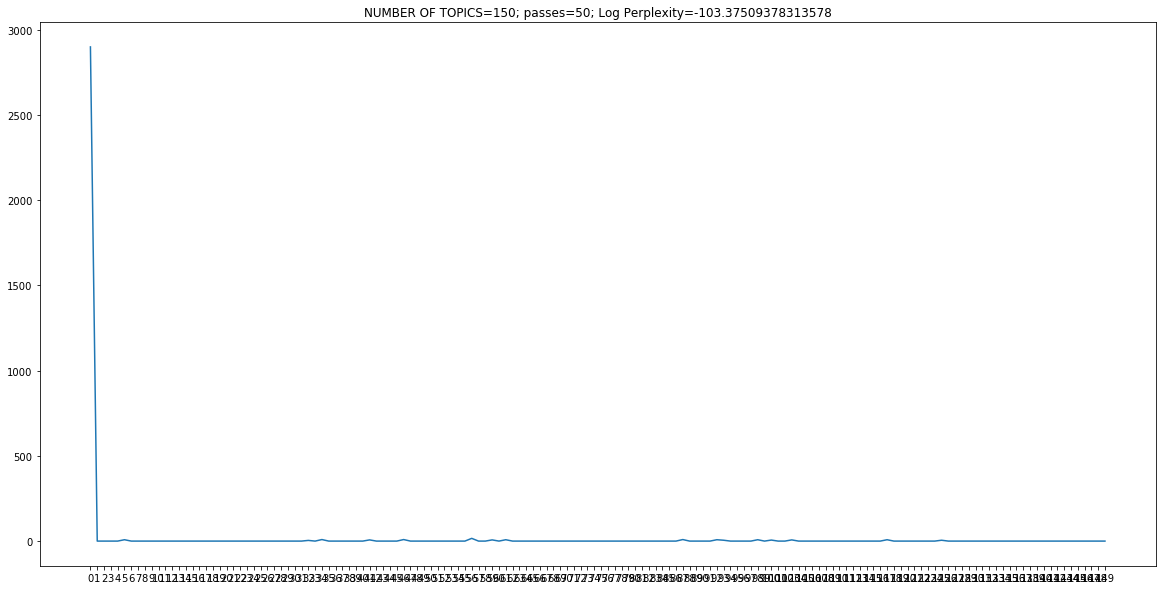

In [26]:
NUM_PASSES=50
for NUM_TOPICS in [10,20,35,50,150]:
    ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=NUM_PASSES,random_state=0)
    #print(ldamodel.print_topics(num_words=7))
    model_arr = np.argmax(ldamodel.get_topics(),axis=0)
    y, x = np.histogram(model_arr, bins=np.arange(NUM_TOPICS+1))
    fig, ax = plt.subplots(figsize=(20,10))
    plt.xticks(ticks=np.arange(NUM_TOPICS),labels=np.arange(NUM_TOPICS+1))
    TITLE='NUMBER OF TOPICS='+str(NUM_TOPICS)+'; passes='+str(NUM_PASSES)+'; Log Perplexity='+str(ldamodel.log_perplexity(corpus))
    plt.title(TITLE)
    ax.plot(x[:-1], y)
    fig.show()

In [27]:
NUM_TOPICS=10

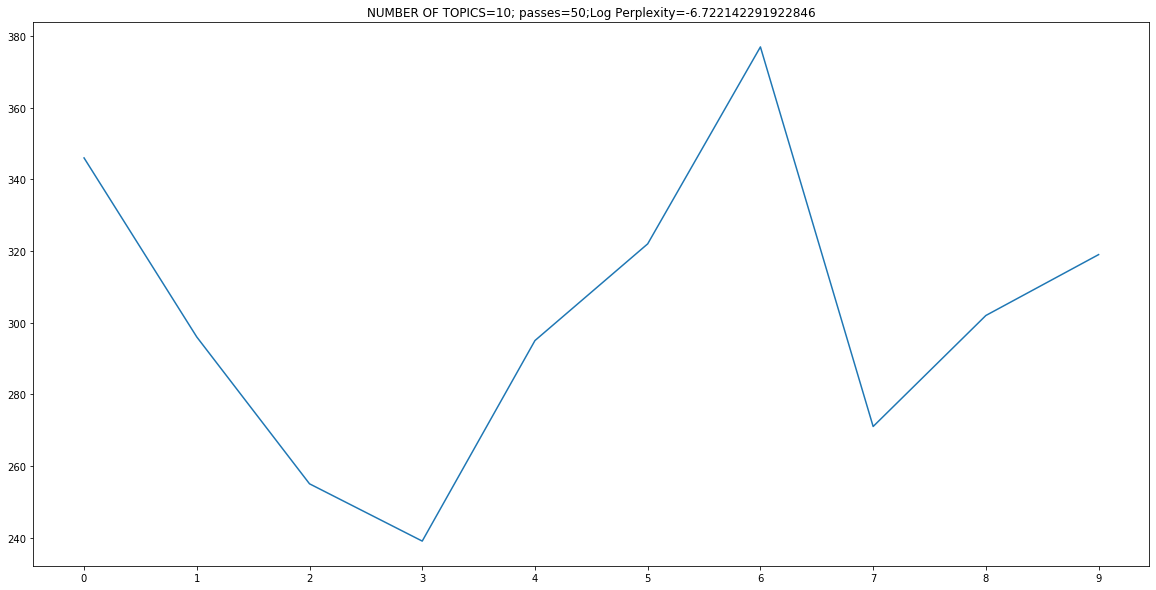

In [28]:
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=NUM_PASSES,random_state=0)
#print(ldamodel.print_topics(num_words=7))
model_arr = np.argmax(ldamodel.get_topics(),axis=0)
y, x = np.histogram(model_arr, bins=np.arange(NUM_TOPICS+1))
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(ticks=np.arange(NUM_TOPICS),labels=np.arange(NUM_TOPICS+1))
TITLE='NUMBER OF TOPICS='+str(NUM_TOPICS)+'; passes='+str(NUM_PASSES)+';Log Perplexity='+str(ldamodel.log_perplexity(corpus))
plt.title(TITLE)
ax.plot(x[:-1], y)
fig.show()

In [29]:
ldamodel.get_topics()

array([[3.4145833e-05, 3.4147299e-05, 3.4144668e-05, ..., 3.4144668e-05,
        3.4144668e-05, 3.4144668e-05],
       [1.9741214e-03, 3.4133896e-05, 3.4141995e-05, ..., 3.4131404e-05,
        3.4140550e-05, 3.4131404e-05],
       [4.2744698e-05, 4.2745334e-05, 4.2744698e-05, ..., 4.2744698e-05,
        4.2744698e-05, 4.2744698e-05],
       ...,
       [4.4240314e-05, 9.8858550e-03, 4.4235592e-05, ..., 4.4235592e-05,
        4.4235592e-05, 4.4235592e-05],
       [3.0093262e-05, 3.0094188e-05, 3.0093099e-05, ..., 2.2181429e-03,
        3.0093099e-05, 3.0093099e-05],
       [4.5065794e-05, 4.5063152e-05, 4.5062810e-05, ..., 4.5062810e-05,
        4.5062810e-05, 4.5062810e-05]], dtype=float32)

In [30]:
model_arr,len(model_arr)

(array([1, 7, 3, ..., 8, 6, 5], dtype=int64), 3022)

In [31]:
model_topic_infer=ldamodel.get_topics()
k_high_model=np.percentile(model_topic_infer,75) 
k_low_model=np.percentile(model_topic_infer,25) 
model_topic_infer_df=pd.DataFrame(model_topic_infer)
model_topic_infer_filter_df=model_topic_infer_df.apply(lambda x: [y if (y > k_low_model and y < k_high_model) else 0 for y in x])

In [32]:
model_topic_infer_filter_df.median(axis=1).sort_values() # median probability for each topic after zeroising bottom and top quartile (across the matrix)

4    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.000000
3    0.000030
5    0.000034
1    0.000034
0    0.000034
2    0.000043
dtype: float64

In [39]:
print(ldamodel.show_topics(num_topics=NUM_TOPICS,num_words=7)[2])

(2, '0.068*"phone" + 0.062*"reservation" + 0.052*"airline" + 0.045*"issue" + 0.045*"mile" + 0.042*"travel" + 0.039*"credit"')


In [33]:
relevant_top10_model_topic=model_topic_infer_filter_df.median(axis=1).sort_values().index[-10:].values.tolist()[::-1]

In [34]:
relevant_top10_model_topic

[2, 0, 1, 5, 3, 9, 8, 7, 6, 4]

In [35]:
for relevant_topic_id in relevant_top10_model_topic:
    print(ldamodel.show_topics(num_topics=NUM_TOPICS,num_words=7)[relevant_topic_id])

(2, '0.068*"phone" + 0.062*"reservation" + 0.052*"airline" + 0.045*"issue" + 0.045*"mile" + 0.042*"travel" + 0.039*"credit"')
(0, '0.106*"guy" + 0.057*"way" + 0.033*"day" + 0.029*"trip" + 0.029*"website" + 0.028*"time" + 0.025*"airline"')
(1, '0.096*"time" + 0.058*"help" + 0.058*"airport" + 0.031*"staff" + 0.029*"refund" + 0.026*"problem" + 0.026*"departure"')
(5, '0.162*"thank" + 0.153*"bag" + 0.034*"fleet" + 0.033*"fleek" + 0.025*"crew" + 0.022*"lot" + 0.019*"ground"')
(3, '0.199*"hour" + 0.113*"hold" + 0.061*"minute" + 0.043*"delay" + 0.031*"time" + 0.030*"plane" + 0.024*"hotel"')
(9, '0.105*"agent" + 0.060*"response" + 0.051*"number" + 0.045*"line" + 0.041*"thank" + 0.025*"phone" + 0.025*"reply"')
(8, '0.123*"flight" + 0.073*"ticket" + 0.058*"tomorrow" + 0.050*"weather" + 0.050*"luggage" + 0.027*"tonight" + 0.026*"night"')
(7, '0.048*"change" + 0.045*"week" + 0.039*"people" + 0.033*"point" + 0.033*"baggage" + 0.032*"employee" + 0.032*"money"')
(6, '0.342*"flight" + 0.060*"plane" + 

In [36]:
bag_of_words=[word for sent in preproc_text for word in sent]

In [37]:
other_texts = [bag_of_words]
other_corpus = [dictionary.doc2bow(text) for text in other_texts]
unseen_doc = other_corpus[0]
ldamodel[unseen_doc]  

[(0, 0.09485937),
 (1, 0.09441237),
 (2, 0.0763333),
 (3, 0.10491317),
 (4, 0.11507682),
 (5, 0.09388359),
 (6, 0.17086706),
 (7, 0.07154882),
 (8, 0.10838692),
 (9, 0.069718584)]

In [38]:
print(ldamodel.show_topics(num_topics=NUM_TOPICS,num_words=7)[6])

(6, '0.342*"flight" + 0.060*"plane" + 0.049*"gate" + 0.040*"min" + 0.024*"time" + 0.018*"pilot" + 0.017*"today"')


In [40]:
ldamodel.log_perplexity(corpus)

-6.72201678277997